In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import warnings
%config Completer.use_jedi = False
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

print(tf.test.gpu_device_name())

In [2]:
# Read the csv file and store into dataFrame
anuran = pd.read_csv('frogs_mfcc.csv', sep = ',')
anuran.sample(10)

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Species
6563,1.000000,0.511578,0.500568,0.289810,0.028352,0.152389,0.091804,-0.073538,0.079625,0.075513,...,-0.029002,-0.001082,0.069663,-0.033013,-0.043957,0.027965,-0.044238,-0.052566,0.073165,HypsiboasCordobae
1521,1.000000,0.210061,0.132931,0.527246,0.184801,0.016609,-0.166408,-0.032586,0.298333,0.062479,...,-0.082268,-0.269823,0.083616,0.230827,-0.000121,-0.152588,-0.152686,0.054161,0.234673,AdenomeraHylaedactylus
3975,1.000000,0.439234,0.180046,0.513669,0.071863,0.033051,-0.096263,-0.073786,0.202717,0.016256,...,-0.156668,-0.183860,0.128085,0.113693,-0.032615,-0.074054,-0.116183,0.065055,0.179867,AdenomeraHylaedactylus
5682,1.000000,0.493535,0.423131,0.247821,0.027608,0.150273,0.059945,-0.051361,0.085261,0.108716,...,0.006241,-0.090093,0.018968,0.065716,-0.011326,-0.001308,0.025194,-0.015544,0.025955,HypsiboasCordobae
6095,1.000000,0.068448,0.294904,0.402516,0.227617,0.222653,0.110672,-0.175465,-0.079616,0.095423,...,-0.020731,-0.120213,-0.017857,0.100556,0.057638,-0.003940,-0.022400,-0.073098,-0.027459,HypsiboasCordobae
3401,1.000000,0.011335,-0.124341,0.296202,0.122151,0.074736,0.006696,0.052122,0.262498,0.167792,...,-0.045425,-0.276949,0.007776,0.199462,0.086548,-0.122710,-0.186576,0.002982,0.235526,AdenomeraHylaedactylus
2435,0.590645,0.955701,0.418602,1.000000,0.107920,-0.009094,-0.235536,0.186496,0.412626,-0.314135,...,-0.200425,-0.412393,0.288542,0.319573,-0.053652,-0.113245,-0.326972,0.096694,0.209796,AdenomeraHylaedactylus
6674,1.000000,0.088428,0.324977,0.583659,-0.011086,0.025217,0.324029,0.055629,-0.125459,-0.024524,...,0.118563,-0.382332,-0.142126,0.204189,-0.033678,-0.199777,0.084925,0.148482,-0.127293,LeptodactylusFuscus
1706,1.000000,0.264015,0.103518,0.558752,0.237474,0.133820,-0.141718,-0.040560,0.200562,0.064745,...,-0.049337,-0.287562,0.019555,0.236875,0.071364,-0.078546,-0.174420,-0.029079,0.225232,AdenomeraHylaedactylus
6659,1.000000,0.505665,0.754755,0.170904,-0.143673,0.317503,0.115409,-0.149176,0.118609,0.175379,...,0.033836,-0.064877,0.068252,0.080136,-0.055742,-0.013665,0.034822,-0.032049,-0.070829,LeptodactylusFuscus


In [3]:
############################################################################
#                          Split the dataset
############################################################################

seed_num = 0

# Seperate the data into dependent and independent variables
X = anuran.drop(['Species'], axis = 1)
y = anuran['Species'].values
print(X.shape)
print(y.shape)

# Scale or normalize the features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Divide the dataset: 80% for training set and 20% for test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed_num)

(7195, 22)
(7195,)


In [4]:
############################################################################
#                  Convert categorical data into numerical
############################################################################
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Convert categorical data (y_train) into integer data
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_train)

# Convert integer data into binary class matrix
y_train_encoded = to_categorical(integer_encoded)

# Convert categorical data (y_test) into integer data
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

In [5]:
############################################################################
#                       Construct a neural network
############################################################################
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

l2 = l2(l=0.01)      # Specify the weight of the regularization

model = Sequential([
    Input(shape=(22,)),
    Dense(50, activation='relu', dtype='float64', kernel_regularizer='l2'), # Apply l2
    Dropout(0.25),
    BatchNormalization(),
    Dense(10, activation='sigmoid', dtype='float64', kernel_regularizer='l2')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1150      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 batch_normalization (BatchN  (None, 50)               200       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
Total params: 1,860
Trainable params: 1,760
Non-trainable params: 100
_________________________________________________________________


In [7]:
loss_fn = tf.keras.losses.CategoricalCrossentropy()  # For multi-class classification

model.compile(optimizer='adam',       # optimizer used to train the model
              loss=loss_fn,           # loss function is specified
              metrics=['accuracy'])   # metric used to monitor the model training

In [8]:
############################################################################
#                     Implement early stopping regularization
############################################################################
from tensorflow.keras.callbacks import EarlyStopping

my_callbacks = [
    EarlyStopping(patience=5, monitor='loss')
]

history = model.fit(X_train, y_train_encoded, batch_size=32, epochs=100, callbacks=my_callbacks)

Epoch 1/100
180/180 [==============================] - 1s 2ms/step - loss: 1.6755 - accuracy: 0.6223
Epoch 2/100
180/180 [==============================] - 0s 2ms/step - loss: 0.8727 - accuracy: 0.8570
Epoch 3/100
180/180 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.8860
Epoch 4/100
180/180 [==============================] - 0s 2ms/step - loss: 0.6189 - accuracy: 0.9048
Epoch 5/100
180/180 [==============================] - 0s 2ms/step - loss: 0.5636 - accuracy: 0.9138
Epoch 6/100
180/180 [==============================] - 0s 2ms/step - loss: 0.5305 - accuracy: 0.9177
Epoch 7/100
180/180 [==============================] - 0s 2ms/step - loss: 0.4957 - accuracy: 0.9248
Epoch 8/100
180/180 [==============================] - 0s 2ms/step - loss: 0.4726 - accuracy: 0.9267
Epoch 9/100
180/180 [==============================] - 0s 2ms/step - loss: 0.4429 - accuracy: 0.9333
Epoch 10/100
180/180 [==============================] - 0s 2ms/step - loss: 0.4336 - accura

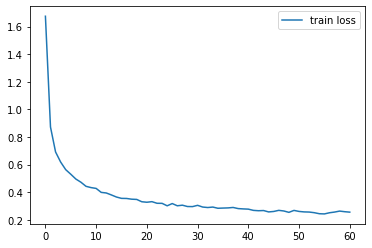

In [9]:
from matplotlib import pyplot as plt

loss_train = history.history['loss']

plt.plot(loss_train, label='train loss')
plt.legend()

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)     # Convert into integer data

print('Accuracy:', accuracy_score(y_test_encoded, y_pred))
print(" ")
print('Confusion matrix:')
print(confusion_matrix(y_test_encoded, y_pred))
print(" ")
print('Classification report:')
print(classification_report(y_test_encoded, y_pred))
print(" ")

45/45 [==============================] - 0s 4ms/step
Accuracy: 0.9610840861709521
 
Confusion matrix:
[[129   0   6   1   0   1   0   2   0   0]
 [  0 695   0   0   1   0   0   0   0   0]
 [  1   0  94   0   0   0   0   0   0   0]
 [  8  11   7  38   0   1   0   0   0   3]
 [  0   0   0   0  98   0   0   0   0   0]
 [  0   2   0   0   1 220   1   2   0   0]
 [  0   0   0   1   0   1  50   1   0   0]
 [  0   0   0   0   4   0   0  16   0   0]
 [  0   0   0   0   0   0   0   0  12   1]
 [  0   0   0   0   0   0   0   0   0  31]]
 
Classification report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       139
           1       0.98      1.00      0.99       696
           2       0.88      0.99      0.93        95
           3       0.95      0.56      0.70        68
           4       0.94      1.00      0.97        98
           5       0.99      0.97      0.98       226
           6       0.98      0.94      0.96        53
         